## This notebook contains a series 

## Notebook Contents
- [YOY Change Calculations](#yoy_change)
- []

<a id='yoy_change'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [2]:
abatement_historical = pd.read_csv('./Data/abatement_calculations.csv')

In [3]:
abatement_historical.set_index('country', inplace=True)

In [4]:
abatement_yoy_change = abatement_historical.diff()
abatement_yoy_change.drop('1990', axis=1, inplace=True)

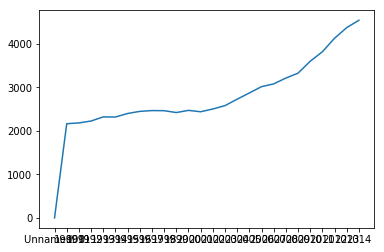

In [5]:
plt.plot(abatement_historical.loc['World',:]);

In [15]:
Countries = ['Belgium', 'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Portugal','Romania',
'Spain','United Kingdom','Turkey','Sweden','Norway','Kazakhstan','Ukraine','Uzbekistan','Canada',
'United States','Argentina','Brazil','Chile','Colombia','Mexico','China','India','Indonesia',
'Japan','Malaysia','Thailand','Australia','New Zealand','Algeria','Nigeria','South Africa','Kuwait',
'Saudi Arabia','United Arab Emirates','World'
    ]

Countries.sort()


emissions = pd.read_csv('./Data/C02_emissions.csv', index_col='Country')
emissions = emissions.loc[emissions.index.isin(Countries)]
emissions.drop(['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1, inplace=True)

In [38]:
reneg = pd.read_csv('./Data/reneg_production.csv', index_col= 'Country')

In [42]:
reneg.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'], axis=1, inplace=True)

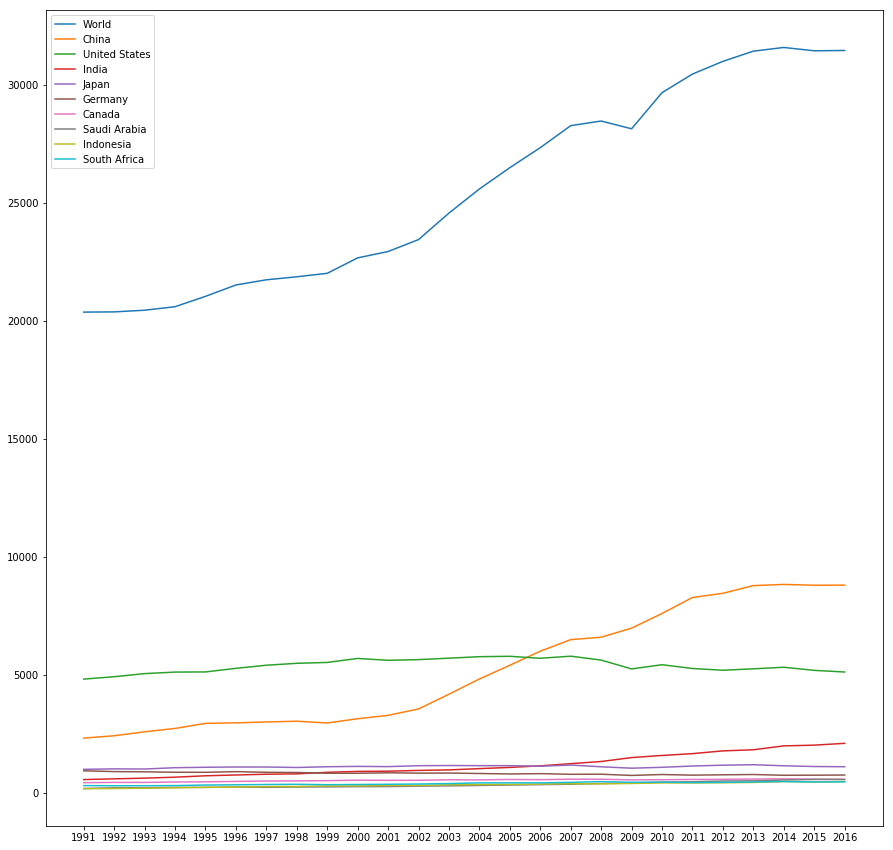

In [21]:
plt.figure(figsize=(15, 15));
for i in range(len(emissions.sort_values('2016', ascending=False)[0:10])):
    plt.plot(emissions.sort_values('2016', ascending=False)[0:10].iloc[i, 1:], label=emissions.sort_values('2016', ascending=False)[0:10].index[i]);
plt.legend();

In [6]:
top_10 = abatement_historical.sort_values('2014', ascending=False)[0:10]

In [7]:
top_10

Unnamed: 0         1990         1991         1992         1993  \
country                                                                         
World                   0  2163.093361  2181.537420  2225.082484  2320.249538   
China                  38   197.209323   190.067242   197.754097   229.011131   
Norway                 19  3668.375438  3618.847800  5934.299000  5954.467200   
Canada                 28   233.588425   224.063758   237.567369   225.734206   
United States          29   297.694249   281.180189   270.727375   294.002858   
Brazil                 32   498.822545   508.578979   519.888703   627.472911   
India                  39    72.791344    73.876386    71.300875    73.634987   
Germany                10    17.022550    16.530274    18.231157    18.823381   
Japan                  41    57.466355    62.061085    53.592710    60.367679   
Italy                  11    30.604016    39.787507    39.277498    37.534222   

                      1994         1995         1996         1997  \
country                                                             
World          2316.958745  2397.863241  2446.337851  2465.152225   
China           251.580640   286.519754   291.545496   290.374046   
Norway         3523.339286  3281.041694  2080.545000  2970.803333   
Canada          221.349320   234.694313   259.831004   273.578820   
United States   275.966261   314.142550   350.481600   346.378575   
Brazil          645.963116   522.499322   506.650645   515.552908   
India            85.799426    76.669613    73.270981    76.476214   
Germany          21.110855    22.862344    23.260726    19.071056   
Japan            45.476420    53.175300    51.915741    56.778133   
Italy            39.245752    35.001593    38.664297    37.867228   

                      1998     ...              2005         2006  \
country                        ...                                  
World          2461.862247     ...       2869.212261  3014.190699   
China           313.397953     ...        523.488766   571.018648   
Norway         3589.911563     ...       2297.869608  1897.625447   
Canada          273.650891     ...        307.427314   301.889839   
United States   307.656503     ...        283.771008   300.432809   
Brazil          523.202597     ...        396.727435   386.381226   
India            83.936285     ...        118.166884   133.945148   
Germany          20.656506     ...         47.253218    53.375448   
Japan            56.812508     ...         54.231680    59.203028   
Italy            38.487645     ...         39.360584    40.067059   

                      2007         2008         2009         2010  \
country                                                             
World          3077.791076  3211.593027  3323.801902  3598.037775   
China           599.442207   712.541398   763.582709   908.494910   
Norway         1514.813088  2158.275346   408.589863   331.362588   
Canada          330.891202   355.923481   357.827061   347.005520   
United States   277.459249   291.990815   307.937104   313.997128   
Brazil          429.039524   365.660548   468.029155   381.564353   
India           147.815092   139.750970   144.082324   154.861653   
Germany          69.283580    68.674612    70.329392    77.848720   
Japan            57.582812    56.564218    54.299673    67.148805   
Italy            36.993214    43.551931    50.048548    55.686059   

                      2011         2012         2013         2014  
country                                                            
World          3815.251839  4126.380591  4369.772803  4539.385508  
China           884.375057  1118.031475  1199.319003  1361.197023  
Norway          390.493059   652.301634   552.019423   573.354574  
Canada          357.015972   372.500906   384.917912   381.999645  
United States   368.793449   345.106246   366.565363   376.853865  
Brazil          427.385829   381.094705   348.394346   339.264127  
India      

In [8]:
top_10.head()

Unnamed: 0         1990         1991         1992         1993  \
country                                                                         
World                   0  2163.093361  2181.537420  2225.082484  2320.249538   
China                  38   197.209323   190.067242   197.754097   229.011131   
Norway                 19  3668.375438  3618.847800  5934.299000  5954.467200   
Canada                 28   233.588425   224.063758   237.567369   225.734206   
United States          29   297.694249   281.180189   270.727375   294.002858   

                      1994         1995         1996         1997  \
country                                                             
World          2316.958745  2397.863241  2446.337851  2465.152225   
China           251.580640   286.519754   291.545496   290.374046   
Norway         3523.339286  3281.041694  2080.545000  2970.803333   
Canada          221.349320   234.694313   259.831004   273.578820   
United States   275.966261   314.142550   350.481600   346.378575   

                      1998     ...              2005         2006  \
country                        ...                                  
World          2461.862247     ...       2869.212261  3014.190699   
China           313.397953     ...        523.488766   571.018648   
Norway         3589.911563     ...       2297.869608  1897.625447   
Canada          273.650891     ...        307.427314   301.889839   
United States   307.656503     ...        283.771008   300.432809   

                      2007         2008         2009         2010  \
country                                                             
World          3077.791076  3211.593027  3323.801902  3598.037775   
China           599.442207   712.541398   763.582709   908.494910   
Norway         1514.813088  2158.275346   408.589863   331.362588   
Canada          330.891202   355.923481   357.827061   347.005520   
United States   277.459249   291.990815   307.937104   313.997128   

                      2011         2012         2013         2014  
country                                                            
World          3815.251839  4126.380591  4369.772803  4539.385508  
China           884.375057  1118.031475  1199.319003  1361.197023  
Norway          390.493059   652.301634   552.019423   573.354574  
Canada          357.015972   372.500906   384.917912   381.999645  
United States   368.793449   345.106246   366.565363   376.853865  

[5 rows x 26 columns]

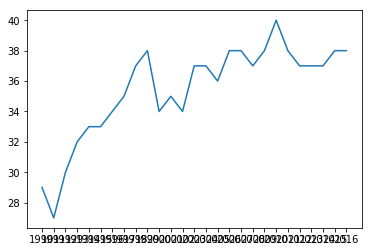

In [34]:
plt.plot(emissions.loc['Norway']);

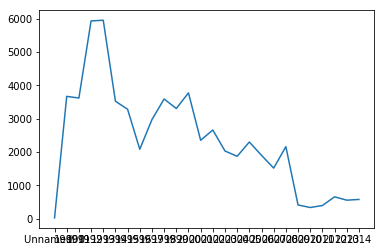

In [35]:
plt.plot(abatement_historical.loc['Norway']);

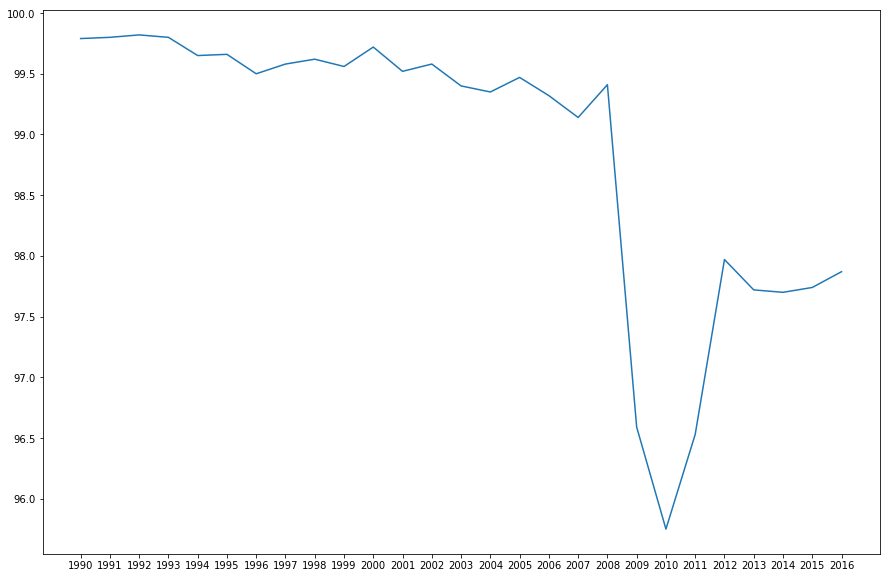

In [49]:
plt.figure(figsize=(15, 10));
plt.plot(reneg.loc['Norway']);

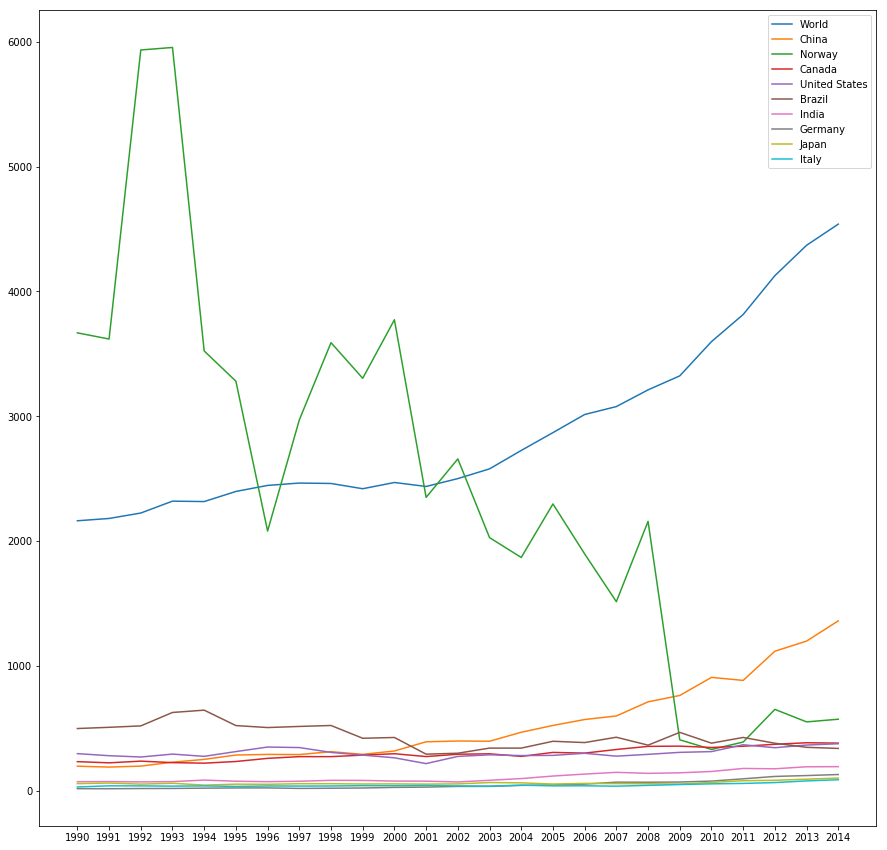

In [9]:
plt.figure(figsize=(15, 15));
for i in range(len(top_10)):
    plt.plot(top_10.iloc[i, 1:], label=top_10.index[i]);
plt.legend();

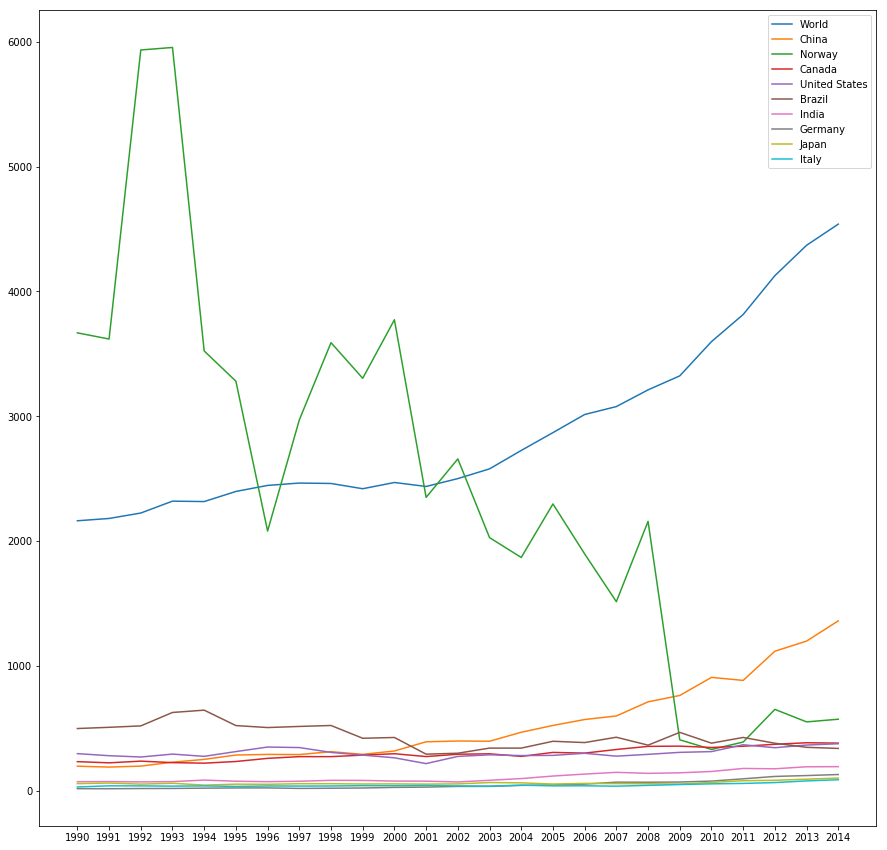

In [26]:
plt.figure(figsize=(15, 15));
for i in range(len(top_10)):
    plt.plot(top_10.iloc[i, 1:], label=top_10.index[i]);
plt.legend();

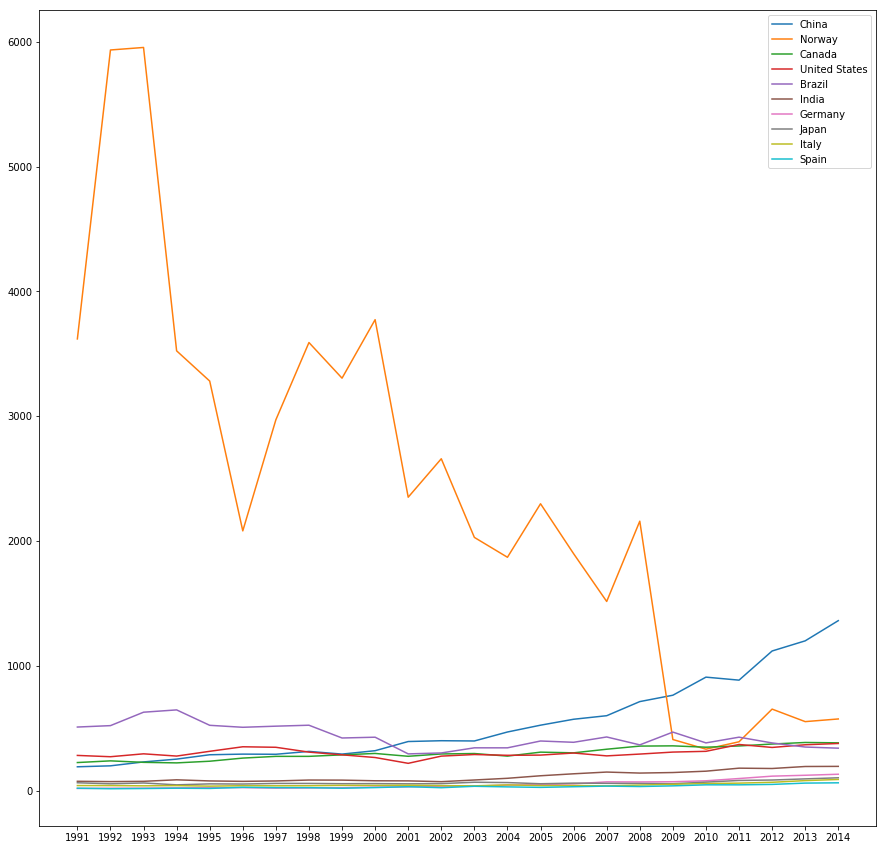

In [8]:
plt.figure(figsize=(15, 15));
for i in range(len(top_10)):
    plt.plot(top_10.iloc[i, 1:], label=top_10.index[i]);
plt.legend();

In [9]:
top_10_nn = top_10.drop(labels='Norway')

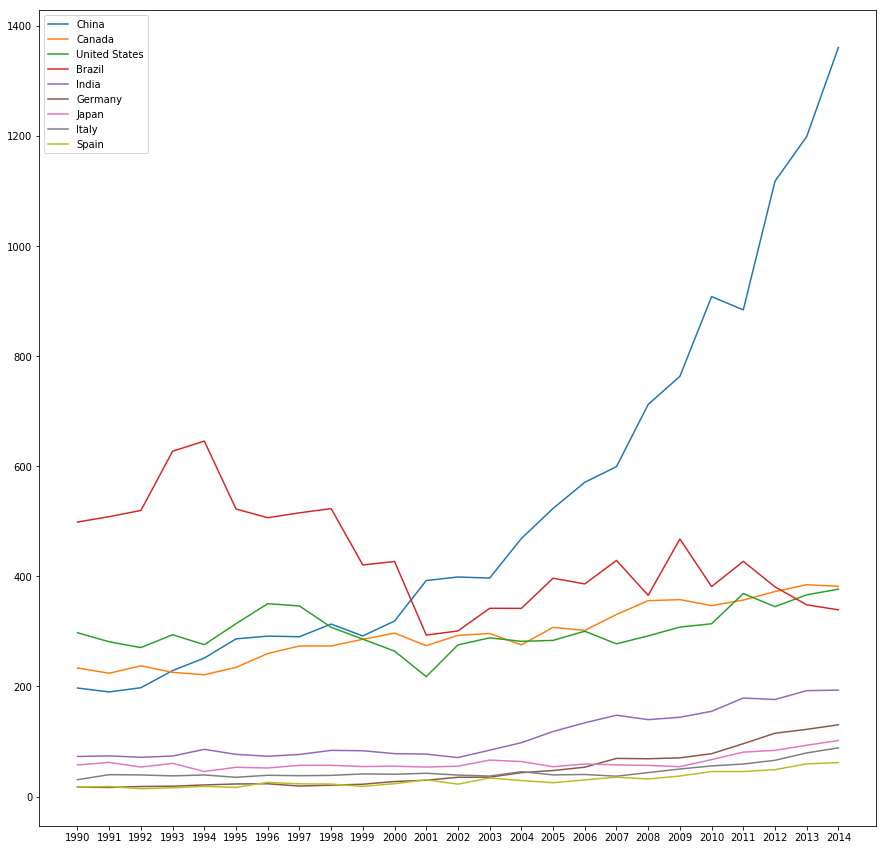

In [10]:
plt.figure(figsize=(15, 15));
for i in range(len(top_10_nn)):
    plt.plot(top_10_nn.iloc[i, :], label=top_10_nn.index[i]);
plt.legend();

- Group countries together that are similar in trend
- "Cohort analysis"

### ARIMA

- build a dataframe where features are lagged timepoints
- target is the next feature in the progression  
  
- specify priors on all coefficients
- specify priors on variance of data
- plug things into the model 
- follow pymc3 lesson

- goal is actually a posterior predictive
- pyflux provides uncertainty bounds (UL + LL)
- for a highly generalized bayesian regression try pymc3
    - you  need to specify priors and distributions
    - begin with something relatively uninformative (broad gaussian, uniform, etc.) 
    
1. write out an equation, which model inteded (ex. regression + variance)
2. specify priors for each coefficient, prior on variance
    - pymc3 this means creating new objects 
3. take existing objects/variables that contain priors and build a likelihood distribution with observed data
    - prior variables act as parameters
    - MCMC
4. estimate y-hat and save values
    - this is where we capture variance
    - write out a function to pull samples from these distributions
    - codify the samples pulled, **construct a distribution of y-hat** fitting to obtain bounds and represent uncertainty or anticipated variance
        - we can use this to set a confidence interval
    - combining these observations to understand uncertainty is where this gets shaky

In [14]:
abatement_time_series = abatement_historical.T

In [21]:
abatement_time_series.columns = abatement_time_series.iloc[0,:]
abatement_time_series.drop('country', inplace=True)

In [22]:
abatement_time_series

country    Algeria Argentina Australia   Belgium   Brazil   Canada    Chile  \
1990      0.202225   19.9962   16.0302  0.511173  498.823  233.588  12.6144   
1991      0.423816   17.4816   17.5863  0.554798  508.579  224.064  20.9216   
1992      0.279782   21.8484   17.0252   0.60915  519.889  237.567  34.7957   
1993      0.473316    22.734   18.0926   0.55569  627.473  225.734  32.9561   
1994      0.215557   25.0232   17.3497  0.661508  645.963  221.349  27.3786   
1995      0.264797   23.8593   16.8152  0.701022  522.499  234.694  27.1268   
1996       0.17252   19.3271   17.2085  0.664418  506.651  259.831   21.803   
1997     0.0999734   24.5348   18.7014  0.625552  515.553  273.579  26.6828   
1998       0.26495   22.4641   18.0363  0.742884  523.203  273.651  17.9683   
1999      0.254168   16.5947    18.708  0.711241  420.832  285.768  13.8256   
2000     0.0665491   22.6454   18.5184  0.849771  427.113  296.953  17.0293   
2001      0.083005   28.3089    18.265   0.83166  293.417  274.235  18.6126   
2002     0.0694489   29.0742   19.0633  0.824367  300.947  292.812  21.5009   
2003      0.302573   25.4769   19.9658   0.82824  342.066  296.338     18.5   
2004      0.268121    22.078   20.0172  0.986774  341.948  275.652  19.6999   
2005      0.575368   24.5503    22.746   1.22516  396.727  307.427  25.9246   
2006      0.220146    30.485   24.6005   1.55669  386.381   301.89    28.69   
2007      0.213309     24.42   23.5026   1.70451   429.04  330.891   22.148   
2008      0.255315   22.2788   21.6439   2.02431  365.661  355.923  25.5964   
2009      0.305163   25.7967    20.463   2.08765  468.029  357.827   27.254   
2010      0.145226   26.5278    23.296   2.62207  381.564  347.006  19.6442   
2011      0.391838   33.0069   28.0538   3.18457  427.386  357.016  22.6166   
2012        0.4873   30.7552   28.4077   4.29603  381.095  372.501  22.2351   
2013      0.244277   32.7771   35.0698   4.43472  348.394  384.918  22.0951   
2014      0.145009   34.9417   38.6855   5.20157  339.264      382  24.3959   

country    China Colombia   France    ...     South Africa    Spain   Sweden  \
1990     197.209  41.6759  10.4974    ...          3.13409  17.1074  9.44513   
1991     190.067  41.0019  12.1646    ...            4.164  18.3134  8.28154   
1992     197.754  30.3603  12.3338    ...          2.28446  14.1979  9.71518   
1993     229.011  39.5106  9.05038    ...          1.61832  15.8853   10.685   
1994     251.581  44.7805  10.8064    ...          2.80282  18.5013  8.05858   
1995      286.52  44.6299  10.7273    ...           2.0452  16.6226  8.96479   
1996     291.545  57.9613  10.0215    ...          3.93633  25.7424  8.40598   
1997     290.374  36.8575   9.1448    ...          5.32608  23.0702  9.31378   
1998     313.398  38.9187  11.2377    ...          4.93976  22.6857  10.2419   
1999     291.839   50.543  11.8364    ...          3.95366  18.4246  8.72065   
2000     318.999  43.0631  11.3486    ...          4.80051  23.3882  10.5335   
2001     392.532  40.7117   11.465    ...          5.18636  30.4486  9.81832   
2002      398.98  44.1337  9.50859    ...          5.51933  22.5218  11.0051   
2003     396.947  52.8172  9.59855    ...          4.63286  33.7558  10.0961   
2004     468.898  56.3158   9.4841    ...          5.83872  29.0724  10.4408   
2005     523.489  54.8115  8.88725    ...          5.19129  25.1471  12.2317   
2006     571.019  55.5675  9.39605    ...          6.86162   30.283  12.5065   
2007     599.442  60.7833  10.4691    ...          4.68539  35.1941  11.6692   
2008     712.541  63.8413  11.1296    ...          5.40781  31.9606  13.2003   
2009     763.583  52.4027  10.6891    ...          5.06773  37.2967  15.4131   
2010     908.495  49.1187  12.0795    ...          6.57546  45.4096  16.6592   
2011     884.375  68.9544  8.27546    ...          6.11573  45.4719  13.3043   
2012     1118.03  59.5633  10.3265    ...          5.36697  48.8663  14.8689   
2013     1199.32  53.7525